In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve

In [2]:
classification_csv = pd.read_csv('classification.csv')
classification_csv.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [3]:
confusion_matrix = np.zeros((2, 2))
for y_pred, y_real in zip(classification_csv['pred'], classification_csv['true']):
    if y_pred == 1 and y_real == 1:
        confusion_matrix[0, 0] += 1
    
    if y_pred == 0 and y_real == 0:
        confusion_matrix[1, 1] += 1
    
    if y_pred == 1 and y_real == 0:
        confusion_matrix[0, 1] += 1
    
    if y_pred == 0 and y_real == 1:
        confusion_matrix[1, 0] += 1

print(pd.DataFrame(confusion_matrix, index=['a(x) = 1', 'a(x) = 0'], columns=['Class 1', 'Class 0']))

          Class 1  Class 0
a(x) = 1     43.0     34.0
a(x) = 0     59.0     64.0


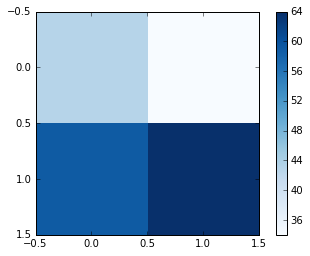

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

In [5]:
acc = accuracy_score(classification_csv['true'], classification_csv['pred'])
precision = precision_score(classification_csv['true'], classification_csv['pred'])
recall = recall_score(classification_csv['true'], classification_csv['pred'])
f1 = f1_score(classification_csv['true'], classification_csv['pred'])

print('Accuracy: {} \nPrecision: {} \nRecall: {} \nF1: {}'.format(acc, precision, recall, f1))

Accuracy: 0.535 
Precision: 0.5584415584415584 
Recall: 0.4215686274509804 
F1: 0.48044692737430167


In [6]:
scores_csv = pd.read_csv('scores.csv')
scores_csv.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [7]:
max_score = 0
max_prec = 0
for score in scores_csv.columns[1:]:
    tmp = roc_auc_score(scores_csv['true'], scores_csv[score])
    if tmp > max_score:
        max_score = tmp
        label = score.split('_')[1]
    print('Algorithm is {}, ROC AUC score is {} \n'.format(score.split('_')[1], 
                                                           tmp))
    
    precs, recs, _ = precision_recall_curve(scores_csv['true'], scores_csv[score])
    tmp_prec = np.max(precs[recs>=0.70])
    if tmp_prec > max_prec:
        max_prec = tmp_prec
        prec_label = score

print('Max score is {} for algorithm {}'.format(max_score, label))
print('Max precision is {} for algorithm {}'.format(max_prec, prec_label))

Algorithm is logreg, ROC AUC score is 0.719187675070028 

Algorithm is svm, ROC AUC score is 0.7086834733893557 

Algorithm is knn, ROC AUC score is 0.6351540616246498 

Algorithm is tree, ROC AUC score is 0.6919267707082833 

Max score is 0.719187675070028 for algorithm logreg
Max precision is 0.6517857142857143 for algorithm score_tree
